# Exponential Distribution

Dustin D. Gerrard
<br>
September 2018

This notebook describes the exponential distribution. This distribution describes the time between events in a Poisson Point Process, "i.e., a process in which events occur continuously and independently at a constant average rate."
<br>
<br>
https://en.wikipedia.org/wiki/Exponential_distribution
<br>
http://reliawiki.org/index.php/The_Exponential_Distribution
<br>
<br>
Examples:
* Time to failure of a part with constant failure rate.
* Time between car accidents.
* Length of a phone call.

<h2><center><u>Exponential p.d.f.</u></center></h2>

\begin{equation*}
\Large
f(t; \lambda) = \lambda e^{-\lambda t}
\end{equation*}

In [1]:
from IPython.core.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/e/ec/Exponential_pdf.svg') 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.special import erf, erfinv

# Exponential Distribution using scipy

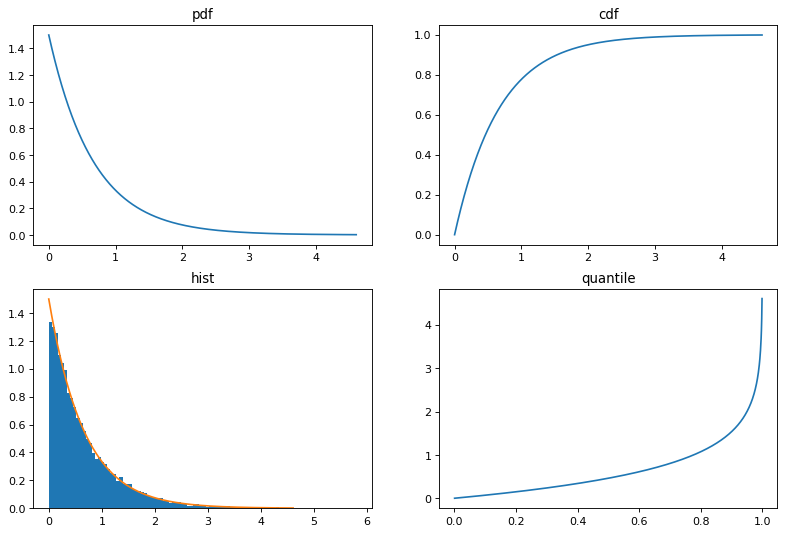

In [11]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
lambda0 = 1.5
x = np.linspace(expon.ppf(1e-14, 0, scale=1/lambda0), expon.ppf(0.999, 0, scale=1/lambda0), 1000) # ppf = percent point function
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(221)
plt.plot(x, expon.pdf(x, 0, scale=1/lambda0)) # pdf = probability distribution function
plt.title('pdf')
plt.subplot(222)
plt.plot(x, expon.cdf(x, 0, scale=1/lambda0)) # cdf = cumumlative distribution function
plt.title('cdf')
plt.subplot(223)
r = expon.rvs(0, scale=1/lambda0, size=10000) # rvs = random variates
plt.hist(r, 100, density=True)
plt.plot(x, expon.pdf(x, 0, scale=1/lambda0))
plt.title('hist')
r = expon.rvs(0, scale=1/lambda0, size=100000)
plt.subplot(224)
q = np.linspace(0.001, 0.999, 1000)
plt.plot(q, expon.ppf(q, 0, scale=1/lambda0))
plt.title('quantile')
plt.show()

# Exponential Distribution explicitly in python

In [3]:
def expDist(lambda0, len0):
    Xs = np.linspace(0, np.ceil(1/lambda0*len0), 101)
    Ys = lambda0*np.exp(-lambda0*Xs)
    CDFs = 1 - np.exp(-lambda0*Xs)
    return Xs, Ys, CDFs

# pdf - probability distribution function

In [4]:
lambda0 = 2 # mean and standard deviation
Xs, Ys, CDFs = expDist(lambda0, 6)

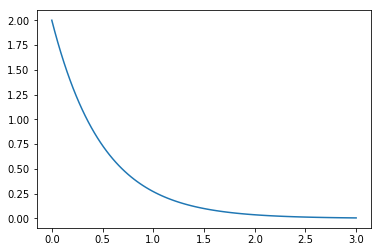

In [5]:
plt.plot(Xs,Ys)
plt.show()

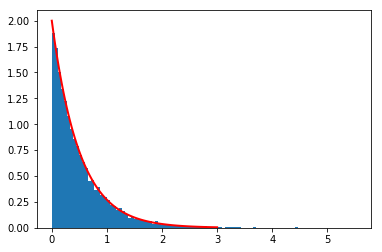

In [6]:
A = np.random.exponential(1/lambda0, 10000)
fig, ax1 = plt.subplots()
plt.hist(A, 100, density=True)
plt.plot(Xs, Ys, linewidth=2, color='r')
# ax2 = ax1.twinx()
# ax2.tick_params('y', colors='r')
plt.show()

# cdf - cumulative distribution function

In [7]:
lambda0 = 2 # mean and standard deviation
Xs, Ys, CDFs = expDist(lambda0, 6)

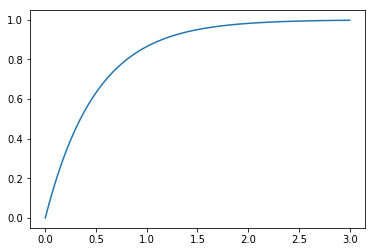

In [8]:
plt.plot(Xs,CDFs)
plt.show()

# Quantile

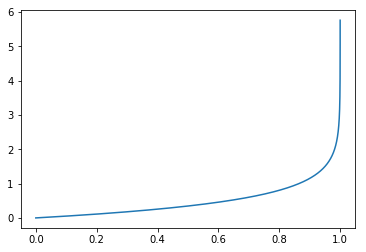

In [9]:
lambda0 = 2
Fs = np.linspace(0,1,100001)
Qs = -np.log(1-Fs)/lambda0
plt.plot(Fs,Qs)
plt.show()

# Two parameter exponential distribution

\begin{equation*}
\Large
f(t; \lambda, \mu) = \lambda e^{-\lambda (t-\gamma)}
\end{equation*}